# K-Fold Cross Validation Project 2

- mobile data 모델링
- target : CHURN
- 교차 검증을 이용해 여러 모델 성능 예측

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# data 불러오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/mobile_cust_churn.csv'
data = pd.read_csv(path)

In [3]:
# 데이터 확인
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [4]:
# 기초통계량 확인
data.describe()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250
std,5773.647028,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558
min,1.000000,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000
25%,5000.750000,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000
50%,10000.500000,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000
75%,15000.250000,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000


In [6]:
# id col 제거
drop_cols = ['id']
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [7]:
# target 설정
target = 'CHURN'

x = data.drop(target, axis=1)
y = data.loc[:, target]

In [8]:
# 가변수화
dumm_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(data=x, columns=dumm_cols, drop_first=True)
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,1,0,0,0,1,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,1,0,0,0,1,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,1,0,0,0,0,0,1,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,1,0,0,0,0,1,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,0,1,0,1,0,0,0,1,0,0


In [9]:
# train, test 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [10]:
# KNN을 위한 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [12]:
# 성능 예측 - KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=5)
cv_score = cross_val_score(model, x_train_s, y_train, cv=10)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result = {}
result['KNN'] = cv_score.mean()

result

[0.60071429 0.59071429 0.61357143 0.59285714 0.57785714 0.58357143
 0.60214286 0.61357143 0.58857143 0.60928571]
평균: 0.5972857142857143
표준편차: 0.011891516440946723


{'KNN': 0.5972857142857143}

In [14]:
# 성능 예측 - DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=1)
cv_score = cross_val_score(model, x_train, y_train, cv=10)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['DecisionTree'] = cv_score.mean()
result

[0.60785714 0.61357143 0.63571429 0.61785714 0.61571429 0.61285714
 0.64       0.60785714 0.61642857 0.62071429]
평균: 0.6188571428571429
표준편차: 0.010282737664530339


{'KNN': 0.5972857142857143, 'DecisionTree': 0.6188571428571429}

In [17]:
# 성능 평가 - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
cv_score = cross_val_score(model, x_train, y_train, cv=10)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['LogisticRegression'] = cv_score.mean()
result

[0.62642857 0.63       0.63142857 0.64285714 0.62571429 0.62571429
 0.64928571 0.63642857 0.65285714 0.62142857]
평균: 0.6342142857142857
표준편차: 0.010239230280382101


{'KNN': 0.5972857142857143,
 'DecisionTree': 0.6188571428571429,
 'LogisticRegression': 0.6342142857142857}

In [19]:
# 시각화 준비 단계
perf_dic = {'model': result.keys(), 'score': result.values()}
df = pd.DataFrame(perf_dic)
df.sort_values(by='score', ascending=False, inplace=True)
df

,model,score
2,LogisticRegression,0.634214
1,DecisionTree,0.618857
0,KNN,0.597286


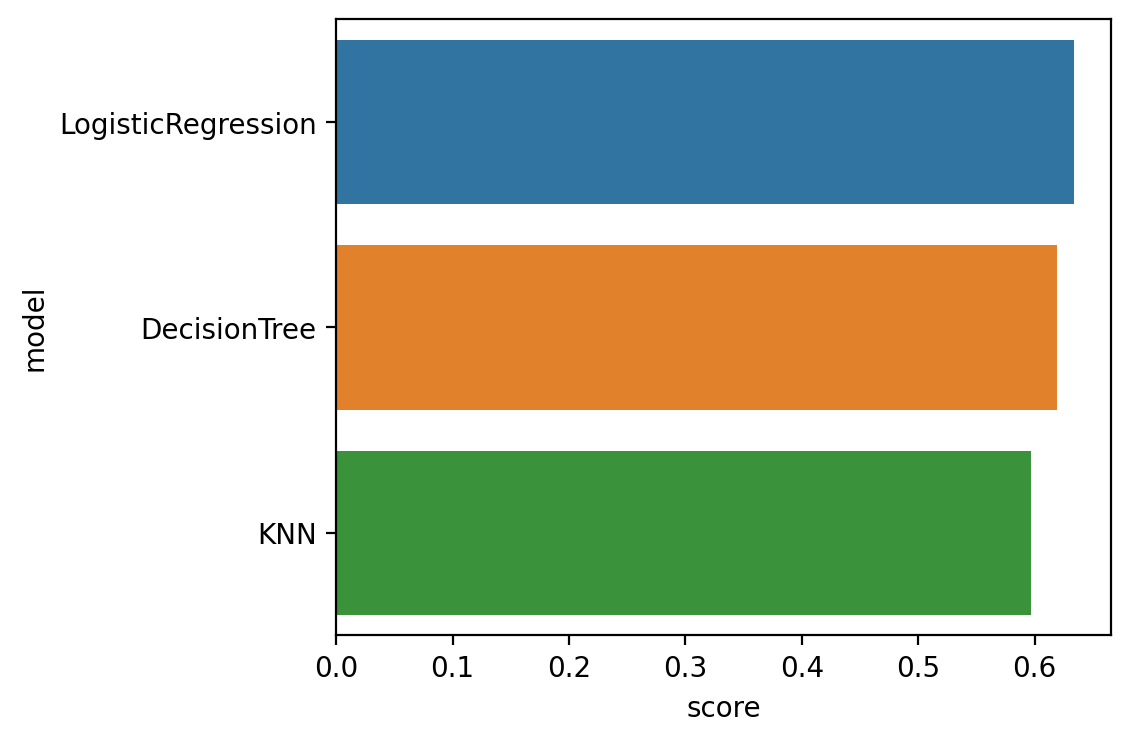

In [20]:
# 시각화
plt.figure(figsize=(5, 4))
sns.barplot(x=df['score'], y=df['model'])
plt.show()

In [21]:
# 성능 평가
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion matrix:
 [[1795 1140]
 [1104 1961]]
              precision    recall  f1-score   support

       LEAVE       0.62      0.61      0.62      2935
        STAY       0.63      0.64      0.64      3065

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.63      0.63      0.63      6000

